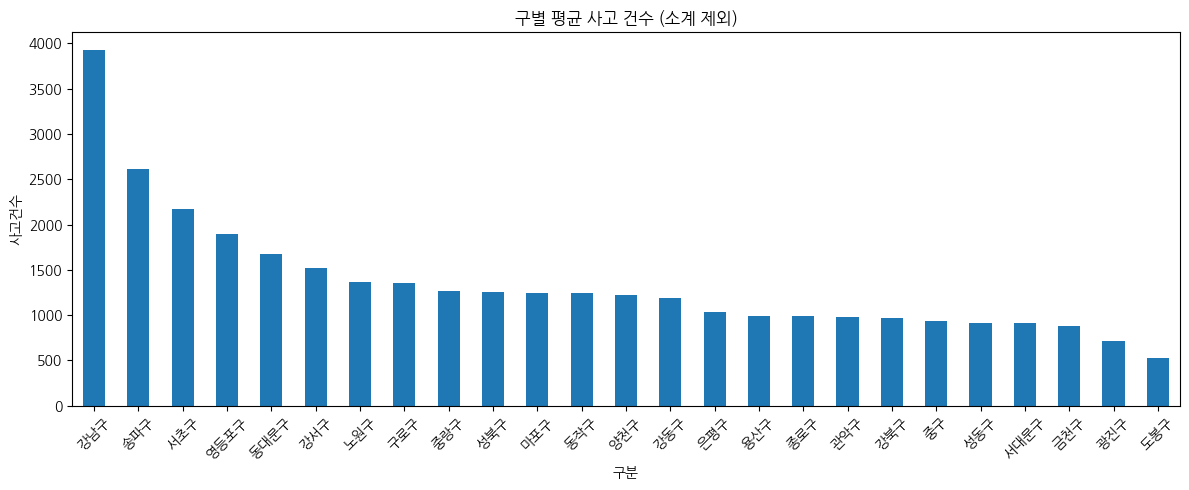

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 불러오기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 기본 폰트로 설정
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
df_gu = pd.read_csv("../data/교통사고+현황(구별)_20250410101227.csv",header=1)
# 컬럼명 정리 (선택)
df_gu.columns = [
    '분류1', '구분', '발생건수', '자동차10000대당발생건수',
    '사망자수', '10만명당사망자수', '부상자수', '10만명당부상자수'
]



# 광진구 필터
df_gwangjin = df_gu[df_gu['구분'] == '광진구']

# 시각화 2: 구별 평균 사고건수
df_filtered = df_gu[~df_gu['구분'].isin(['소계', '합계'])]

df_avg = df_filtered.groupby('구분')['발생건수'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
df_avg.plot(kind='bar')
plt.title("구별 평균 사고 건수 (소계 제외)")
plt.ylabel("사고건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

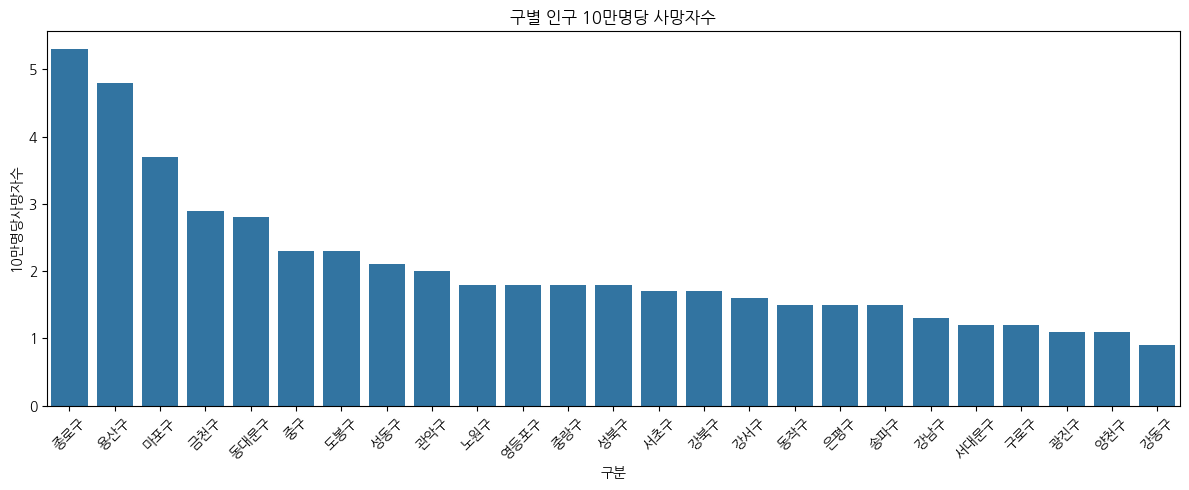

In [8]:
import seaborn as sns
# 소계 제거
df_clean = df_gu[~df_gu['구분'].isin(['소계', '합계'])]

# 사망률 순위
df_sorted = df_clean[['구분', '10만명당사망자수']].sort_values(by='10만명당사망자수', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='구분', y='10만명당사망자수', data=df_sorted)
plt.title("구별 인구 10만명당 사망자수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# 수치형 컬럼 변환 (혹시 문자열일 수 있어서)
df_filtered.loc[:, ['발생건수', '사망자수', '부상자수']] = \
    df_filtered[['발생건수', '사망자수', '부상자수']].apply(pd.to_numeric, errors='coerce')

df_filtered.loc[:, '사고치명률(%)'] = (df_filtered['사망자수'] / df_filtered['발생건수']) * 100
df_filtered.loc[:, '부상률(%)'] = (df_filtered['부상자수'] / df_filtered['발생건수']) * 100




AttributeError: 'DataFrame' object has no attribute 'roc'

## 서울시 평균보다 광진구는 사고 건수와 사망자 수가 적다.
- 그렇다고 해서 교통사고에 대한 분석이 필요 없다는 뜻은 아니다. 예방은 항상 중요하고 예방을 하지 못한다면 그 이후 사고가 더 크게 일어날 수 있기 때문이다.